In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp
%matplotlib inline

In [2]:
df = pd.read_pickle('../data/ALL.pkl')
print(df.shape)
df.head()

(7440252, 18)


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016
2,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016
3,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016
4,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,100.0,08-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1074981,P2016


In [27]:
def print_unique_values(df):
    for column in df.columns.values:
        pp.pprint(column + '(' + str(len(df[column].unique())) + '): ' + str(df[column].unique()))
        print('')

print_unique_values(df)

("cand_nm(25): ['Rubio, Marco' 'Santorum, Richard J.' 'Perry, James R. "
 "(Rick)'\n"
 ' \'Carson, Benjamin S.\' "Cruz, Rafael Edward \'Ted\'" \'Paul, Rand\'\n'
 " 'Clinton, Hillary Rodham' 'Sanders, Bernard' 'Fiorina, Carly'\n"
 ' \'Huckabee, Mike\' \'Pataki, George E.\' "O\'Malley, Martin Joseph"\n'
 " 'Graham, Lindsey O.' 'Bush, Jeb' 'Trump, Donald J.' 'Jindal, Bobby'\n"
 " 'Christie, Christopher J.' 'Walker, Scott' 'Stein, Jill'\n"
 " 'Webb, James Henry Jr.' 'Kasich, John R.' 'Gilmore, James S III'\n"
 " 'Lessig, Lawrence' 'Johnson, Gary' 'McMullin, Evan']")

("contbr_city(26455): ['WASHINGTON' 'ATLANTA' 'DPO' ..., 'ANDERSONANDERSON'\n"
 " 'WHAT IS THE NAME OF THE CITY W' 'NIBLEY']")

("contbr_st(116): ['20' '30' 'AE' 'AK' 'AL' 'AM' 'AP' 'AR' 'AZ' 'CA' 'CO' 'CT' "
 "'DC' 'DE' 'FF'\n"
 " 'FL' 'FR' 'GA' 'GU' 'HI' 'IA' 'ID' 'IL' 'IN' 'IS' 'KS' 'KY' 'LA' 'LO' 'MA'\n"
 " 'MD' 'ME' 'MI' 'MN' 'MO' 'MP' 'MS' 'MT' 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV'\n"
 " 'NY' 'OH' 'OK' 'ON' 'OR' 'PA' 'PR' '

("receipt_desc(203): [nan 'REATTRIBUTION / REDESIGNATION REQUESTED' "
 "'REATTRIBUTION FROM SPOUSE'\n"
 " 'REATTRIBUTION TO SPOUSE' 'Refund' 'SEE REATTRIBUTION'\n"
 " 'REDESIGNATION TO GENERAL' 'REDESIGNATION FROM PRIMARY'\n"
 " 'REDESIGNATION TO PRESIDENTIAL GENERAL'\n"
 " 'REDESIGNATION FROM SENATE GENERAL' 'REATTRIBUTION TO SPOUSE REQUESTED'\n"
 " 'SEE REATTRIBUTION/REDESIGNATION BELOW'\n"
 " 'REATTRIBUTION/REDESIGNATION REQUESTED'\n"
 " '2016 SENATE PRIMARY DONOR REDESIGNATION TO GENERAL'\n"
 " '2016 SENATE PRIMARY DONOR REDESIGNATION FROM PRIMARY'\n"
 " 'US CITIZEN REDESIGNATION TO GENERAL' 'REATTRIBUTION'\n"
 " 'REVERSAL OF REDESIGNATION PER DONORS REQUEST. SEE REATTRIBUTION TO "
 "SPOUSE'\n"
 " 'REDESIGNATION FROM PRIMARY; REFUNDED $80.00 ON 11/20/2015'\n"
 " ' SEE REATTRIBUTION' 'SEE ATTRIBUTION REDESIGNATION TO GENERAL'\n"
 " 'SEE ATTRIBUTION REDESIGNATION FROM PRIMARY'\n"
 " 'REFUND TO BE ISSUED REDESIGNATION TO GENERAL'\n"
 " 'REFUND TO BE ISSUED REDESIGNATION FROM PRIMARY'\

("memo_text(1721): [nan 'DEBT RETIREMENT' 'EARMARKED FROM CLUB FOR GROWTH' "
 '...,\n'
 " 'REATTRIBUTION / REDESIGNATION REQUESTED REFUNDED $2700.00 ON 12/31/2015'\n"
 " 'SEE REFUND, NEXT REPORT' '* IN-KIND: EVENT REGISTRATION FEE']")

("election_tp(11): ['P2016' 'G2016' nan 'P2012' 'P2018' 'P2015' 'P2020' "
 "'P2019' 'G2015'\n"
 " 'O2016' 'G2106']")



In [5]:
df.drop(['cmte_id', 'cand_id', 'contbr_nm', 'memo_cd', 'form_tp', 'file_num', 'tran_id'], axis = 1, inplace = True)
print(df.shape)
df.head()

(7440252, 11)


,cand_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_text,election_tp
0,"Rubio, Marco",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,P2016
1,"Rubio, Marco",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,DEBT RETIREMENT,P2016
2,"Rubio, Marco",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,P2016
3,"Rubio, Marco",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,P2016
4,"Rubio, Marco",APO,AE,090960009,US ARMY,PHYSICIAN,100.0,08-MAR-16,NaN,NaN,P2016


In [7]:
df[df.contb_receipt_amt > 2700]

,cand_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_text,election_tp
293,"Rubio, Marco",HOLLYWOOD,AL,357526210,KELLER LUMBER,BUSINESS OWNER,5000.0,29-FEB-16,REATTRIBUTION / REDESIGNATION REQUESTED,REATTRIBUTION / REDESIGNATION REQUESTED,P2016
433,"Rubio, Marco",HUNTSVILLE,AL,358011482,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5400.0,26-FEB-16,SEE REATTRIBUTION,SEE REATTRIBUTION,P2016
443,"Rubio, Marco",HUNTSVILLE,AL,358112638,INTUITIVE RESEARCH,CEO,4300.0,29-FEB-16,SEE REATTRIBUTION,SEE REATTRIBUTION,P2016
524,"Rubio, Marco",HUNTSVILLE,AL,358063306,COLSA CORPORATION,PRESIDENT AND CEO,5300.0,29-FEB-16,SEE REATTRIBUTION,SEE REATTRIBUTION,P2016
627,"Rubio, Marco",BIRMINGHAM,AL,352331705,SHANNON WALTCHACK LLC,PARTNER,5400.0,06-JAN-16,NaN,NaN,P2016
764,"Rubio, Marco",JASPER,AL,355043445,RETIRED,RETIRED,3000.0,25-NOV-15,NaN,NaN,P2016
844,"Rubio, Marco",ATMORE,AL,365025025,NaN,NaN,5400.0,04-DEC-15,NaN,NaN,P2016
952,"Rubio, Marco",GUNTERSVILLE,AL,359766465,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5400.0,04-DEC-15,SEE REATTRIBUTION,SEE REATTRIBUTION,P2016
1126,"Rubio, Marco",VESTAVIA,AL,352422242,MILOS TEN COMPANY,OWNER,5150.0,02-DEC-15,NaN,NaN,P2016
1230,"Rubio, Marco",VESTAVIA,AL,352422570,RELIANCE FINANCIAL GROUP,CEO,5400.0,29-JUN-15,NaN,NaN,P2016


In [18]:
df[df.contbr_employer == 'COLSA CORPORATION']

,cand_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_text,election_tp
521,"Rubio, Marco",HUNTSVILLE,AL,358063306,COLSA CORPORATION,PRESIDENT AND CEO,-2700.0,29-FEB-16,REATTRIBUTION TO SPOUSE,REATTRIBUTION TO SPOUSE,P2016
524,"Rubio, Marco",HUNTSVILLE,AL,358063306,COLSA CORPORATION,PRESIDENT AND CEO,5300.0,29-FEB-16,SEE REATTRIBUTION,SEE REATTRIBUTION,P2016
588092,"Cruz, Rafael Edward 'Ted'",PLEASANT HOPE,MO,657258196,COLSA CORPORATION,IT CONSULTANT,5.0,16-APR-16,NaN,NaN,P2016
593005,"Cruz, Rafael Edward 'Ted'",PLEASANT HOPE,MO,657258196,COLSA CORPORATION,IT CONSULTANT,5.0,03-MAY-16,NaN,NaN,P2016
953288,"Clinton, Hillary Rodham",SOMERVILLE,AL,356704208,COLSA CORPORATION,SOFTWARE ENGINEER,50.0,13-JAN-16,NaN,* HILLARY VICTORY FUND,P2016
953308,"Clinton, Hillary Rodham",SOMERVILLE,AL,356704208,COLSA CORPORATION,SOFTWARE ENGINEER,250.0,13-JAN-16,NaN,* HILLARY VICTORY FUND,P2016
953669,"Clinton, Hillary Rodham",MADISON,AL,357582541,COLSA CORPORATION,INFORMATION MANAGER,5.0,28-OCT-16,NaN,NaN,G2016
953833,"Clinton, Hillary Rodham",SOMERVILLE,AL,356704208,COLSA CORPORATION,SOFTWARE ENGINEER,200.0,28-FEB-16,NaN,NaN,P2016
953941,"Clinton, Hillary Rodham",SOMERVILLE,AL,356704208,COLSA CORPORATION,SOFTWARE ENGINEER,200.0,28-FEB-16,NaN,NaN,P2016
953970,"Clinton, Hillary Rodham",SOMERVILLE,AL,356704208,COLSA CORPORATION,SOFTWARE ENGINEER,250.0,04-FEB-16,NaN,NaN,P2016


(array([  7.44023000e+06,   9.00000000e+00,   6.00000000e+00,
          4.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   -93308.   ,   1193793.358,   2480894.716,   3767996.074,
          5055097.432,   6342198.79 ,   7629300.148,   8916401.506,
         10203502.864,  11490604.222,  12777705.58 ]),
 <a list of 10 Patch objects>)

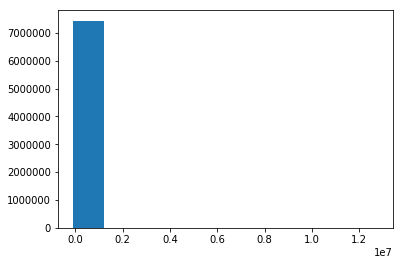

In [19]:
plt.hist(list(df.loc[:, 'contb_receipt_amt']))
#list(df.loc[0:10, 'contb_receipt_amt'])